#  hiclass - k-evolution comparison

## Loading libraries

In [34]:
import numpy as np
import matplotlib

import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
import h5py
from mayavi import mlab
# from readgadget import *
# from pygadgetreader import *
ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
           "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
           "cyan","khaki","lightcoral","gray"]
# ColorsII = []

NUM_COLORS = 20
from matplotlib.colors import LogNorm

cm = plt.get_cmap('gist_rainbow')
# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'
from matplotlib import colors, ticker, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
plt.rcParams['font.serif'] = 'Ubuntu'
from matplotlib import colors, ticker, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict

from scipy.interpolate import interp1d

text_size=26
fig_size_x=24
fig_size_y=14

def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
    
data = nested_dict(7, list)
    

# Loading BG files

In [35]:
direct = "./../Data/"

data['class']['bg'] = np.loadtxt("./../../hi_class_pub_devel//output/kessence_power00_background.dat")

# files=["LP-dt0d01-nKe10","LP-dt0d01-nKe60","Eu-dt0d01-nKe10","Eu-dt0d01-nKe60","RK2-dt0d04-nKe1"]
files=["Nbody"]

#############    
### gevolution #
#############
for k in files: #method
    print(k)
    data['Nbody_max'][k]=np.loadtxt("./../output/Results_max.txt");
    data['Nbody_min'][k]=np.loadtxt("./../output/Results_min.txt");
    data['Nbody'][k]=np.loadtxt("./../output//Result_avg.txt");
    data['Nbody_bg'][k]=np.loadtxt("./../output/file__background.dat");

# for i in range(1): #method
# #     print(k)
#     data['Nbody'][k]=np.loadtxt("./../output//Result_avg.txt");
    
    

Nbody


## Hubble comparison

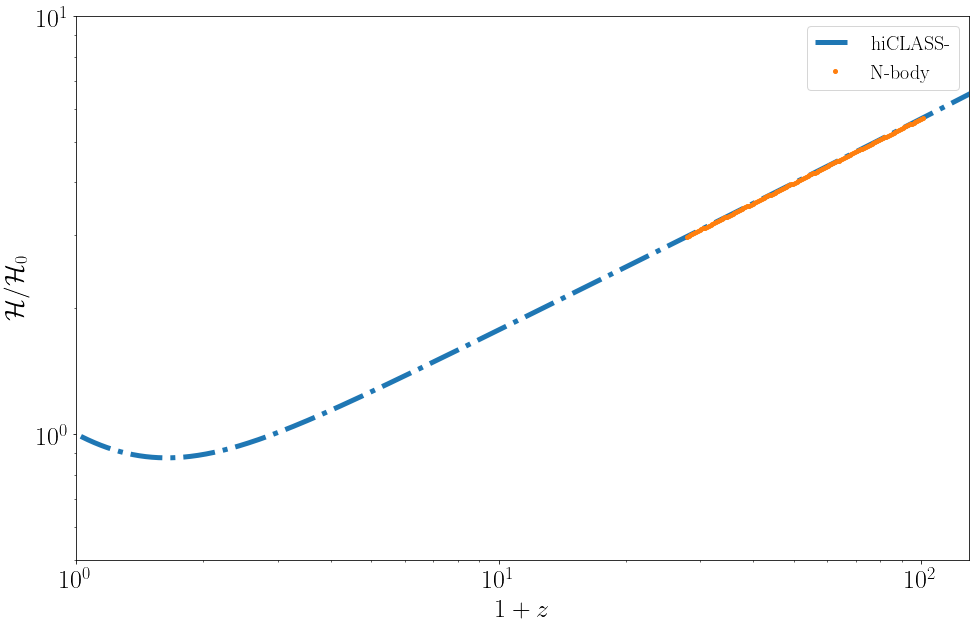

In [36]:
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
Boxsize=300.;

# c_gev=2997.92458; #[100km/s]
H0_conf_Gev=0.11117550483538947#np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
# we obtain 0.11 from gevolution!

#####################
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)

class_file = data['class']['bg'];
H_class_interp = interp1d(class_file[:,0], class_file[:,3])
z = class_file[:,0]
a = 1./(1+z)
plt.plot(1+class_file[:,0],class_file[:,3]*a/H_class_interp(0.0),"-.",lw=5,label=r"hiCLASS-")

for k in files: #method
    bg_gev = data['Nbody_bg'][k];
    a_gev=bg_gev[:,2]
    zpone= 1./a
    plt.plot(1./(bg_gev[:,2]),bg_gev[:,3],"o",markersize=4,label="N-body")
    
plt.ylabel(r"$\mathcal{H}/\mathcal{H}_0$")
plt.xlabel(r"$1+z$")
plt.xlim(1, 130 )
plt.ylim(5.e-1, 10.e0)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)



# $\varphi$, $\varphi'$

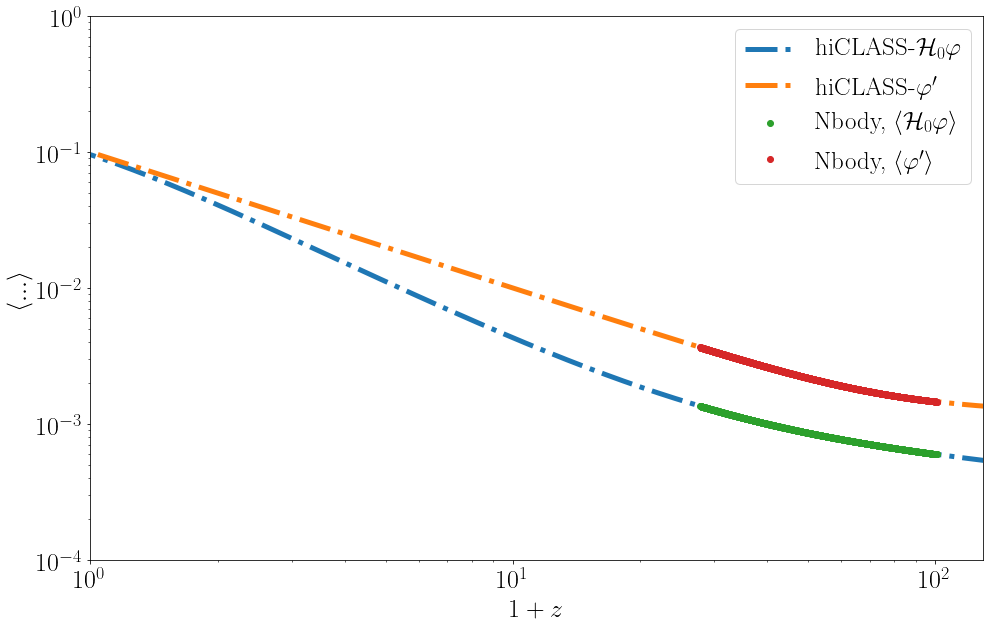

In [37]:
#####################
class_file = data['class']['bg'];
phi_smg = interp1d(class_file[:,0], class_file[:,30])
phi_prime = interp1d(class_file[:,0], class_file[:,31])
H_class = interp1d(class_file[:,0], class_file[:,3])

#####################
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)

a = 1./(1+class_file[:,0])
X = class_file[:,31]**2/(2.0 * a**2)
X_hat = 0.005
# P =  p(class_file[:,0]);
# dKdX = (rho(class_file[:,0]) + p(class_file[:,0]))/(2.0 * X)

# cs2_hiclass = cs2(class_file[:,0]);
phi_hiclass = phi_smg (class_file[:,0])
phi_p_hiclass = phi_prime (class_file[:,0])

H0 = H_class(0.0);

plt.plot(1+class_file[:,0],phi_hiclass*H0,"-.",lw=5,label=r"hiCLASS-$ \mathcal H_0\varphi$")
# plt.plot(1+class_file[:,0], X - X_hat,"-.",lw=5,label=r"hiCLASS-$\delta X$")
plt.plot(1+class_file[:,0], class_file[:,31],"-.",lw=5,label=r"hiCLASS-$\varphi'$")



# for k in files: #method
#     avg_file_out = data['Nbody'][k];
# #     phi_gev = interp1d(avg_file_out[:,0],avg_file_out[:,1])
# #     phi_prime_gev = interp1d(avg_file_out[:,0],avg_file_out[:,2])
    
# #     plt.plot(1+avg_file_out[:,0],np.abs(avg_file_out[:,1]),".",label=k+r", $\langle \varphi \rangle$")
#     plt.plot(1+avg_file_out[:,0],avg_file_out[:,2],"o",label=k+r", $\langle \varphi' \rangle$")
    
for k in files: #method
    avg_file_out = data['Nbody'][k];
#     phi_gev = interp1d(avg_file_out[:,0],avg_file_out[:,1])
#     phi_prime_gev = interp1d(avg_file_out[:,0],avg_file_out[:,2])
    
    plt.plot(1+avg_file_out[::,0],avg_file_out[::,1],"o",label=k+r", $\langle \mathcal{H}_0 \varphi \rangle$")
    plt.plot(1+avg_file_out[::,0],avg_file_out[::,2],"o",label=k+r", $\langle \varphi' \rangle$")


plt.ylabel(r"$\langle ...\rangle$")
plt.xlabel(r"$1+z$")
plt.xlim(1, 130 )
plt.ylim(1.e-4, 1.e0)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=25)



# Looking at the maximum of $\varphi$ and $\varphi'$

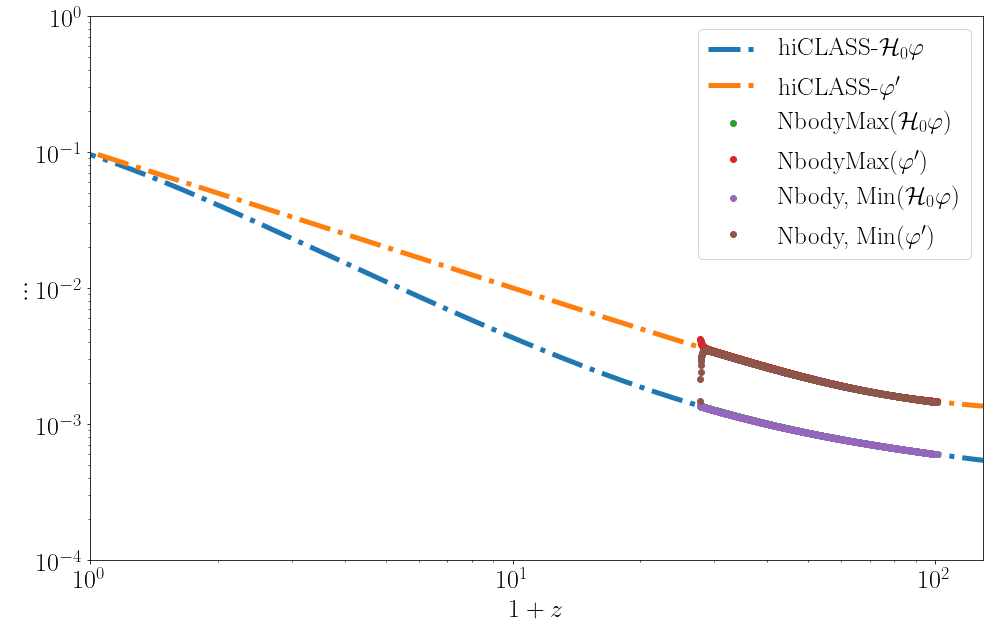

In [38]:
#####################
class_file = data['class']['bg'];
phi_smg = interp1d(class_file[:,0], class_file[:,30])
phi_prime = interp1d(class_file[:,0], class_file[:,31])
H_class = interp1d(class_file[:,0], class_file[:,3])

#####################
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)

a = 1./(1+class_file[:,0])
X = class_file[:,31]**2/(2.0 * a**2)
X_hat = 0.005
# P =  p(class_file[:,0]);
# dKdX = (rho(class_file[:,0]) + p(class_file[:,0]))/(2.0 * X)

# cs2_hiclass = cs2(class_file[:,0]);
phi_hiclass = phi_smg (class_file[:,0])
phi_p_hiclass = phi_prime (class_file[:,0])

H0 = H_class(0.0);

plt.plot(1+class_file[:,0],phi_hiclass*H0,"-.",lw=5,label=r"hiCLASS-$ \mathcal H_0\varphi$")
# plt.plot(1+class_file[:,0], X - X_hat,"-.",lw=5,label=r"hiCLASS-$\delta X$")
plt.plot(1+class_file[:,0], class_file[:,31],"-.",lw=5,label=r"hiCLASS-$\varphi'$")



# for k in files: #method
#     avg_file_out = data['Nbody'][k];
# #     phi_gev = interp1d(avg_file_out[:,0],avg_file_out[:,1])
# #     phi_prime_gev = interp1d(avg_file_out[:,0],avg_file_out[:,2])
    
# #     plt.plot(1+avg_file_out[:,0],np.abs(avg_file_out[:,1]),".",label=k+r", $\langle \varphi \rangle$")
#     plt.plot(1+avg_file_out[:,0],avg_file_out[:,2],"o",label=k+r", $\langle \varphi' \rangle$")
    
for k in files: #method
    max_file_out = data['Nbody_max'][k];
#     phi_gev = interp1d(avg_file_out[:,0],avg_file_out[:,1])
#     phi_prime_gev = interp1d(avg_file_out[:,0],avg_file_out[:,2])
    
    plt.plot(1+max_file_out[:,0],max_file_out[:,1],"o",label=k+r"Max$(\mathcal{H}_0 \varphi)$")
    plt.plot(1+max_file_out[:,0],max_file_out[:,2],"o",label=k+r"Max$( \varphi')$")

for k in files: #method
    file_out = data['Nbody_min'][k];
#     phi_gev = interp1d(avg_file_out[:,0],avg_file_out[:,1])
#     phi_prime_gev = interp1d(avg_file_out[:,0],avg_file_out[:,2])
    
    plt.plot(1+file_out[:,0],file_out[:,1],"o",label=k+r", Min$(\mathcal{H}_0 \varphi)$")
    plt.plot(1+file_out[:,0],file_out[:,2],"o",label=k+r", Min$( \varphi')$")

plt.ylabel(r"$...$")
plt.xlabel(r"$1+z$")
plt.xlim(1, 130 )
plt.ylim(1.e-4, 1.e0)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=25)



#  $c_s^2$

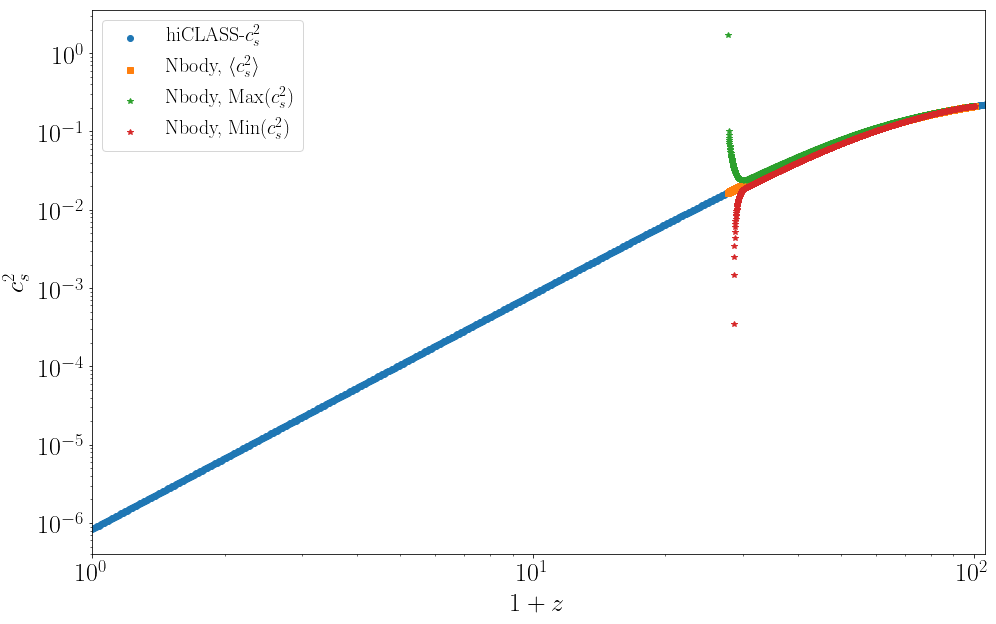

In [39]:
#####################
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)


## hiclass:

class_file = data['class']['bg'];
cs2_interp = interp1d(class_file[:,0], class_file[:,28])
redshift = interp1d(class_file[:,0], class_file[:,2])

plt.plot(1+class_file[:,0],class_file[:,28],"o",lw=5,label=r"hiCLASS-$c_s^2$")

# a = 1./(1+class_file[:,0])
# X = class_file[:,29]**2/(2.0 * a**2)
# P =  p(class_file[:,0]);
# dKdX = (rho(class_file[:,0]) + p(class_file[:,0]))/(2.0 * X)
# cs2_hiclass = cs2(class_file[:,0]);
# plt.plot(1+class_file[:,0],cs2_hiclass,"-.",label=r"hiCLASS-$c_s^2$")



for k in files: #method
    avg_file_out = data['Nbody'][k][::];
    phi_gev = interp1d(avg_file_out[:,0],avg_file_out[:,1])
    phi_prime_gev = interp1d(avg_file_out[:,0],avg_file_out[:,5])
    
#     plt.plot(1+avg_file_out[:,0],np.abs(avg_file_out[:,1]),"s",label=k+r", $\langle \varphi \rangle$")
#     plt.plot(1+avg_file_out[:,0],np.abs(avg_file_out[:,2]),"s",label=k+r", $\langle \varphi' \rangle$")
    plt.plot(1+avg_file_out[0::1,0],avg_file_out[0::1,5],"s",label=k+r", $\langle c_s^2 \rangle$")

for k in files: #method
    avg_file_out = data['Nbody_max'][k][::1];
#     phi_gev = interp1d(avg_file_out[:,0],avg_file_out[:,1])
#     phi_prime_gev = interp1d(avg_file_out[:,0],avg_file_out[:,5])
    
#     plt.plot(1+avg_file_out[:,0],np.abs(avg_file_out[:,1]),"s",label=k+r", $\langle \varphi \rangle$")
#     plt.plot(1+avg_file_out[:,0],np.abs(avg_file_out[:,2]),"s",label=k+r", $\langle \varphi' \rangle$")
    plt.plot(1+avg_file_out[0::1,0],avg_file_out[0::1,4],"*",label=k+r", Max$(c_s^2)$")

for k in files: #method
    avg_file_out = data['Nbody_min'][k][::1];
#     phi_gev = interp1d(avg_file_out[:,0],avg_file_out[:,1])
#     phi_prime_gev = interp1d(avg_file_out[:,0],avg_file_out[:,5])
    
#     plt.plot(1+avg_file_out[:,0],np.abs(avg_file_out[:,1]),"s",label=k+r", $\langle \varphi \rangle$")
#     plt.plot(1+avg_file_out[:,0],np.abs(avg_file_out[:,2]),"s",label=k+r", $\langle \varphi' \rangle$")
    plt.plot(1+avg_file_out[:,0],(avg_file_out[:,4]),"*",label=k+r", Min$(c_s^2)$")

plt.ylabel(r"$c_s^2$")
plt.xlabel(r"$1+z$")
plt.xlim(1, 106 )
# plt.ylim(1.e-7, 0.3)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)



# Power spectra

In [19]:
from os.path import exists

# redshift_nbody =  [  100.0, 95.0, 90.0, 85.0, 80.0, 75.0, 70.0, 50.0, 40.0,30.0, 20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0]
# redshift =  [ 100.0, 95.0, 90.0, 85.0, 80.0, 75.0, 70.0, 50.0, 40.0,30.0, 20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0]
redshift =  [100.0, 99.0, 98.0, 95.0, 90.0, 85.0, 80.0, 75.0, 70.0, 50.0, 40.0,30.0, 29, 28, 27, 26.7, 25, 20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7]
direct = "./../output/"
direc_hi = "./../../hi_class_pub_devel/output/"
for i in range(np.shape(redshift)[0]):
    file_exists = exists(direct+"/pk_"+str(i).zfill(3)+"_pi_k.dat")
    data["file_exist"]["z="+str(redshift[i])] = file_exists;
    print(file_exists)
    if (file_exists):
        print("file_exists:",file_exists," for z="+str(redshift[i]))
        data["pk"]["m"]["z="+str(redshift[i])] = np.loadtxt(direct+"/pk_"+str(i).zfill(3)+"_delta.dat")
        data["pk"]["pi_k"]["z="+str(redshift[i])] = np.loadtxt(direct+"/pk_"+str(i).zfill(3)+"_pi_k.dat")
        data["pk"]["zeta"]["z="+str(redshift[i])] = np.loadtxt(direct+"/pk_"+str(i).zfill(3)+"_zeta.dat")
    
    data["class"]["tk"]["z="+str(redshift[i])] = np.loadtxt(direc_hi+"/kessence_power00_z"+str(i+1)+"_tk.dat")
    data["class"]["pm"]["z="+str(redshift[i])] = np.loadtxt(direc_hi+"/kessence_power00_z"+str(i+1)+"_pk.dat")

# CLASS conversion :
k_pivot = 0.05
A_s = 2.1e-9
n_s = 0.96
h = 0.67
k_class = data["class"]["tk"]["z="+str(redshift[0])][:,0]


True
('file_exists:', True, ' for z=100.0')
True
('file_exists:', True, ' for z=99.0')
True
('file_exists:', True, ' for z=98.0')
True
('file_exists:', True, ' for z=95.0')
True
('file_exists:', True, ' for z=90.0')
True
('file_exists:', True, ' for z=85.0')
True
('file_exists:', True, ' for z=80.0')
True
('file_exists:', True, ' for z=75.0')
True
('file_exists:', True, ' for z=70.0')
True
('file_exists:', True, ' for z=50.0')
True
('file_exists:', True, ' for z=40.0')
True
('file_exists:', True, ' for z=30.0')
True
('file_exists:', True, ' for z=29')
True
('file_exists:', True, ' for z=28')
True
('file_exists:', True, ' for z=27')
True
('file_exists:', True, ' for z=26.7')
True
('file_exists:', True, ' for z=25')
True
('file_exists:', True, ' for z=20.0')
True
('file_exists:', True, ' for z=10.0')
True
('file_exists:', True, ' for z=6.0')
True
('file_exists:', True, ' for z=5.0')
True
('file_exists:', True, ' for z=4.0')
True
('file_exists:', True, ' for z=3.0')
True
('file_exists:', 

## $\varphi$ power

file_exists: for z=50.0
file_exists: for z=40.0
file_exists: for z=30.0
file_exists: for z=29
file_exists: for z=28
file_exists: for z=27
file_exists: for z=26.7


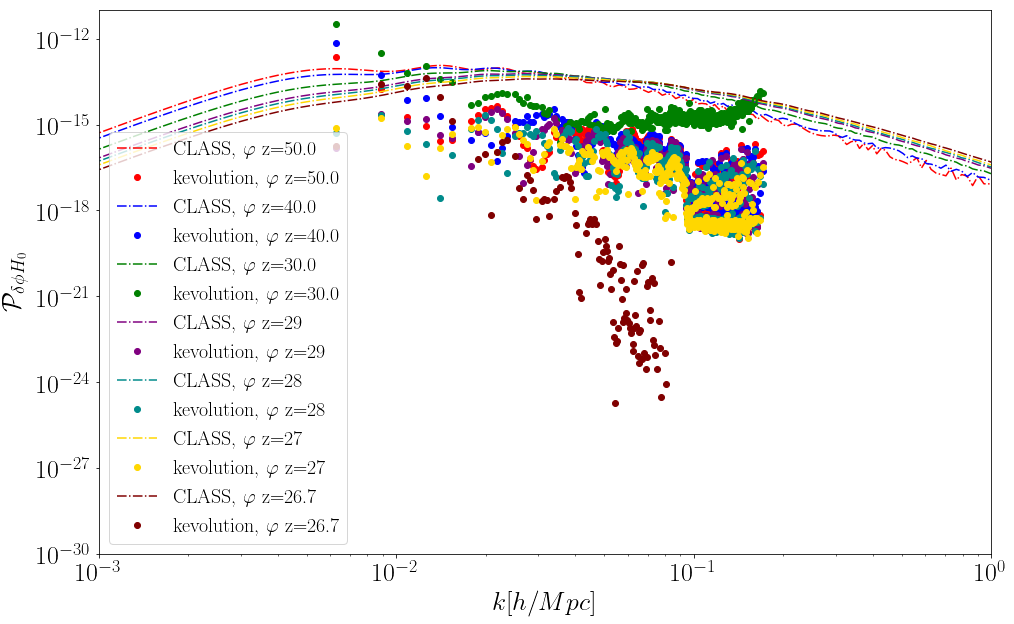

In [20]:
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)

# phi_bar is the output of hiclass background. 
# delta_phi = v_x_smg * (phi_bar_prime/a)
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
Boxsize=320.;
c_gev=2997.92458; #[100km/s]
H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;

##### Interpolations:
phi_smg_interp = interp1d(class_file[:,0], class_file[:,30])
phi_prime_interp = interp1d(class_file[:,0], class_file[:,31])
phi_prime_prime_interp = interp1d(class_file[:,0], class_file[:,32])
H_class_interp = interp1d(class_file[:,0], class_file[:,3])

Normlization=As*(data['class']['tk']["z="+str(100.)][:,0]/k_pivot)**(ns-1.);

l=0
# for z in redshift[::8]:
# for z in [redshift[0],redshift[1],redshift[2],redshift[3]]:
for z in redshift[9:16]:

    k_class = data["class"]["tk"]["z="+str(z)][:,0]
    tk_v_x = data["class"]["tk"]["z="+str(z)][:,5] #* vx_smg 
    tk_v_x_prime = data["class"]["tk"]["z="+str(z)][:,6] # vx_smg_prime
    a = 1./(1.+z);
    phi_smg = phi_smg_interp(z)
    phi_prime = phi_prime_interp(z)
    phi_prime_prime = phi_prime_prime_interp(z)
    
    delta_phi = (phi_prime/a) * tk_v_x  ;

    pk_hiclass = delta_phi**2 * Normlization # What is computed in kev is Hconf * pi
    plt.plot(k_class, pk_hiclass * H_class_interp(0.0)* H_class_interp(0.0) ,"-.",color=ColorsI[l],label=r"CLASS, $\varphi$"+" z="+str(z))
    
    
    if (data["file_exist"]["z="+str(z)]):
        print("file_exists: for z="+str(z))
        kgev = data["pk"]["pi_k"]["z="+str(z)][:,0]
        pkgev = data["pk"]["pi_k"]["z="+str(z)][:,1]
        plt.plot(kgev, pkgev ,"o",color=ColorsI[l],label=r"kevolution, $\varphi$"+" z="+str(z))
    l=l+1

plt.ylabel(r"$\mathcal{P}_{\delta \phi H_0}$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xlim(0.001, 1 )
plt.ylim(1.e-30, 1.e-11)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)



## $\varphi'$ power

z=100.0
file_exists: for z=100.0
z=99.0
file_exists: for z=99.0
z=98.0
file_exists: for z=98.0


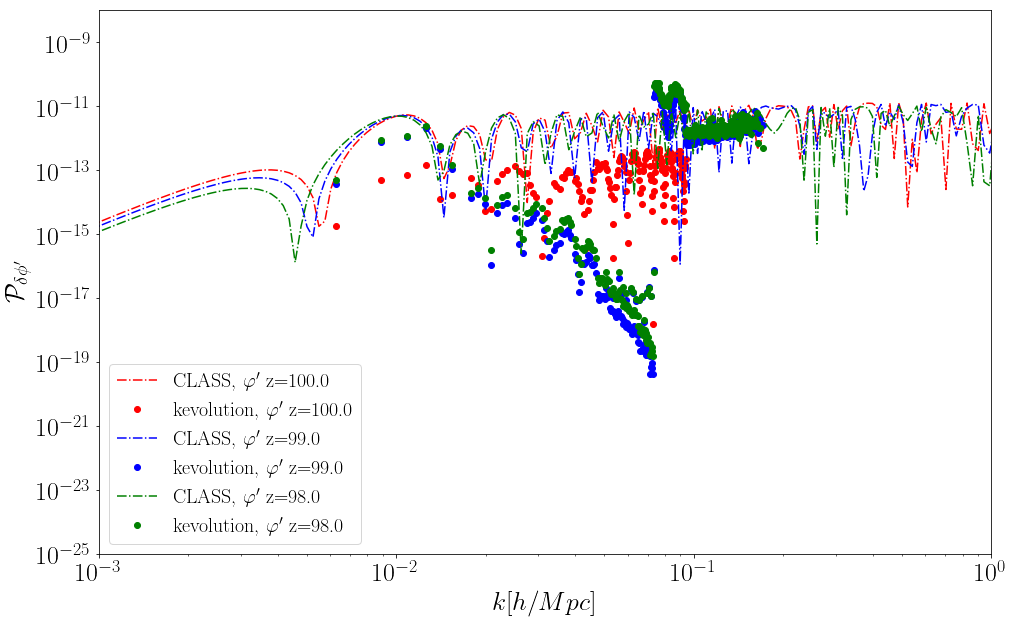

In [21]:
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)

# phi_bar is the output of hiclass background. 
# delta_phi = v_x_smg * (phi_bar_prime/a)
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
Boxsize=320.;
c_gev=2997.92458; #[100km/s]
H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;

##### Interpolations:
phi_smg_interp = interp1d(class_file[:,0], class_file[:,30])
phi_prime_interp = interp1d(class_file[:,0], class_file[:,31])
phi_prime_prime_interp = interp1d(class_file[:,0], class_file[:,32])
H_class_interp = interp1d(class_file[:,0], class_file[:,3])

Normlization=As*(data['class']['tk']["z="+str(100.)][:,0]/k_pivot)**(ns-1.);

l=0
# for z in redshift[::8]:
for z in [redshift[0],redshift[1],redshift[2]]:

# for z in [redshift[0],redshift[1]]:
    print("z="+str(z))
    k_class = data["class"]["tk"]["z="+str(z)][:,0]
    tk_v_x = data["class"]["tk"]["z="+str(z)][:,5] #* vx_smg 
    tk_v_x_prime = data["class"]["tk"]["z="+str(z)][:,6] # vx_smg_prime
    a = 1./(1.+z);
    phi_smg = phi_smg_interp(z)
    phi_prime = phi_prime_interp(z)
    phi_prime_prime = phi_prime_prime_interp(z)
    
    delta_phi = (phi_prime/a) * tk_v_x  ;
    delta_phi_prime = (phi_prime/a) * (tk_v_x_prime  + (phi_prime_prime/phi_prime - H_class_interp(z)*a) * tk_v_x ) ;

    pk_hiclass = delta_phi_prime**2 * Normlization # What is computed in kev is Hconf * pi
    plt.plot(k_class, pk_hiclass,"-.",color=ColorsI[l],label=r"CLASS, $\varphi'$"+" z="+str(z))
        
    if (data["file_exist"]["z="+str(z)]):
        print("file_exists: for z="+str(z))        
        kgev = data["pk"]["zeta"]["z="+str(z)][:,0]
        pkgev = data["pk"]["zeta"]["z="+str(z)][:,1]
        plt.plot(kgev, pkgev ,"o",color=ColorsI[l],label=r"kevolution, $\varphi'$"+" z="+str(z))
    l=l+1

plt.ylabel(r"$\mathcal{P}_{\delta \phi'}$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xlim(0.001, 1 )
plt.ylim(1.e-25, 1.e-8)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)



## Matter power

In [7]:
# plt.figure(figsize=(16,10))
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}
# plt.rc('font', **font)

# # phi_bar is the output of hiclass background. 
# # delta_phi = v_x_smg * (phi_bar_prime/a)

# for i in redshift:
#     k_class = data["class"]["tk"]["z="+str(i)][:,0]
#     conversion = A_s*(k_class*h/k_pivot)**(n_s-1)*(2.*np.pi**2/(k_class**3));
#     tk_cdm = data["class"]["tk"]["z="+str(i)][:,3] # cdm
#     tk_b = data["class"]["tk"]["z="+str(i)][:,3] # b
#     rho_m = rho_cdm(i)+rho_b(i)
#     tk = (rho_cdm(i)/rho_m) * tk_cdm + (rho_b(i)/rho_m) * tk_b 
#     pk_hiclass = tk**2 * conversion 
#     plt.plot(k_class, pk_hiclass ,"o",label=r"CLASS, tk-$\delta$"+" z="+str(i))
#     #########################
#     pkm_hiclass = data["class"]["pm"]["z="+str(i)][:,1]
#     k_class = data["class"]["pm"]["z="+str(i)][:,0]
#     plt.plot(k_class, pkm_hiclass ,"o",label=r"CLASS, $\delta_m$"+" z="+str(i))

#     #########################
#     kgev = data["pk"]["m"]["z="+str(i)][:,0]
#     pkgev = data["pk"]["m"]["z="+str(i)][:,1]
#     plt.plot(kgev,pkgev*(2.0 * np.pi**2)/kgev**3 ,"o",label=r"kevolution, $\delta$"+" z="+str(i))


# plt.ylabel(r"${P}_m$")
# plt.xlabel(r"$k$")
# plt.xlim(0.01, 1 )
# plt.ylim(1.e-2, 1.e7)
# plt.yscale('log')
# plt.xscale('log')
# plt.legend(fontsize=20)

